# Вторая часть теоремы CLT

Распределение средних величин выборок является нормальным распределением, со стандартным отклонением равным стандартному отклонению значений всей популяции деленной на квадратный корень размера выборки.

Стандартное отклонение распределения средних значений выборки также исзвестна как **стандартная ошибка оценки среднего значения (standart of the estimate of the mean)**

В большинстве случаев мы не можем знать стандартное отклоение популяции, в таком случае мы и используем формулу стандартной ошибки оценки среднего значения

$$
\frac{Standart Deviation Of Our Sample}{\sqrt{Sample Size}}
$$

Всегда нужно помнить две важные вещи об этой формуле
- если растет размер выборки, стандартная ошибка будет уменьшаться
- если растет стандартное отклоение всей популяции, стандартная ошибка также будет расти

In [1]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

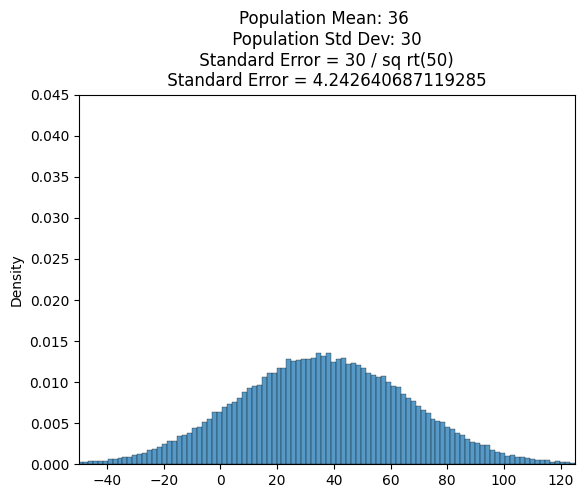

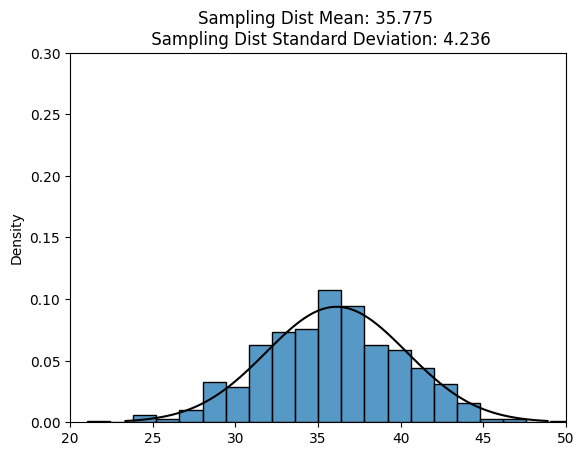

In [4]:
# создаем переменные
# среднее значение популяции
population_mean = 36
# стандартное отклоение популяции
population_std_dev = 30
# размер популяции
samp_size = 50
# создаем набор данных из случайных значений
population = np.random.normal(population_mean, population_std_dev, size=100000)
# создаем лист средних значений выборок
sample_means = []

# используем цикл для выборки
for i in range(500):
    samp = np.random.choice(population, size=samp_size, replace=False)
    sample_means.append(samp.mean())

mean_sampling_distribution = round(np.mean(sample_means), 3)
std_sampling_distribution = round(np.std(sample_means), 3)
std_error = population_std_dev / np.sqrt(samp_size)
# создаем график
sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlim(-50,125)
plt.ylim(0,0.045)
plt.show()
plt.clf()

## Plot the sampling distribution
sns.histplot(sample_means, stat = 'density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
# plt.axvline(mean_sampling_distribution,color='r',linestyle='dashed')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}")
plt.xlim(20,50)
plt.ylim(0,0.3)
plt.show()
